## Question 3.15

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

In [74]:
data_1 = pd.read_csv('chapter3/CH03PR15.txt', header=None, sep='\s+')

In [75]:
data_1.columns = ['Y', 'X']

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     55.99
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           4.61e-06
Time:                        17:48:55   Log-Likelihood:                -9.0225
No. Observations:                  15   AIC:                             22.05
Df Residuals:                      13   BIC:                             23.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5753      0.249     10.354      0.0

/Users/pedro/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


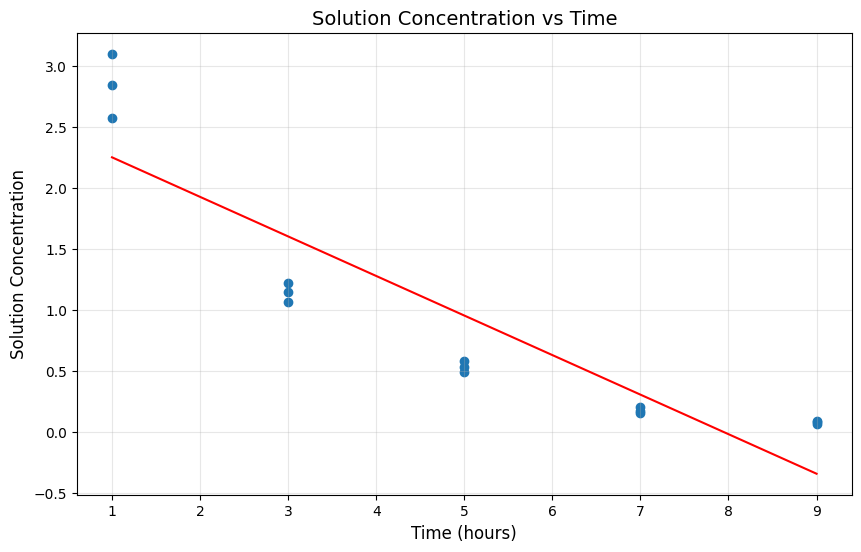


Means for each X level:
     X         Y
0  1.0  2.836667
1  3.0  1.146667
2  5.0  0.533333
3  7.0  0.180000
4  9.0  0.080000

Lack of Fit Test:
F statistic = 55.993836
p-value = 0.000001
F critical (α = 0.025) = 4.825621

Hypothesis Test:
H0: The linear model is adequate (no lack of fit)
H1: The linear model is not adequate (there is lack of fit)
Decision Rule: Reject H0 if F > 4.825621
Decision: Reject H0
Conclusion: There is significant lack of fit in the linear model.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


df = data_1


model = ols('Y ~ X', data=df).fit()
print(model.summary())



plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], model.predict(), color='red')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Solution Concentration', fontsize=12)
plt.title('Solution Concentration vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

X_means = df.groupby('X')['Y'].mean().reset_index()
print("\nMeans for each X level:")
print(X_means)


SSE_reduced = sum((df['Y'] - model.predict())**2)

SSE_pure = 0
for x_val in df['X'].unique():
    y_values = df[df['X'] == x_val]['Y']
    y_mean = y_values.mean()
    SSE_pure += sum((y_values - y_mean)**2)

SS_lof = SSE_reduced - SSE_pure

df_lof = len(X_means) - 2  
df_pe = len(df) - len(X_means)  

MS_lof = SS_lof / df_lof
MS_pe = SSE_pure / df_pe

F_stat = model.fvalue
p_value = 1 - stats.f.cdf(F_stat, df_lof, df_pe)

alpha = 0.025
F_critical = stats.f.ppf(1-alpha, df_lof, df_pe)

print("\nLack of Fit Test:")
print(f"F statistic = {F_stat:.6f}")
print(f"p-value = {p_value:.6f}")
print(f"F critical (α = 0.025) = {F_critical:.6f}")

if F_stat > F_critical:
    decision = "Reject H0"
    conclusion = "There is significant lack of fit in the linear model."
else:
    decision = "Fail to reject H0"
    conclusion = "There is not enough evidence to conclude lack of fit in the linear model."

print("\nHypothesis Test:")
print("H0: The linear model is adequate (no lack of fit)")
print("H1: The linear model is not adequate (there is lack of fit)")
print(f"Decision Rule: Reject H0 if F > {F_critical:.6f}")
print(f"Decision: {decision}")
print(f"Conclusion: {conclusion}")





Box-Cox Transformation Results:
   Lambda        SSE
0    -2.0  68.842805
1    -1.0   3.168468
2    -0.5   0.550847
3     0.0   0.038973
4     0.1   0.043961
5     0.2   0.081318
6     0.5   0.444294
7     1.0   2.924653

Log10 Transformation Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1838.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           2.19e-15
Time:                        18:07:56   Log-Likelihood:                 24.748
No. Observations:                  15   AIC:                            -45.50
Df Residuals:                      13   BIC:                            -44.08
Df Model:                           1                                         
Covariance Type:   

/Users/pedro/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_53726/3215373057.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_log = log_model.params[0]
/var/folders/52/y8mfvm1n6vj12ntkl_p9hqw80000gn/T/ipykernel_53726/3215373057.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_log = log_model.params[1]


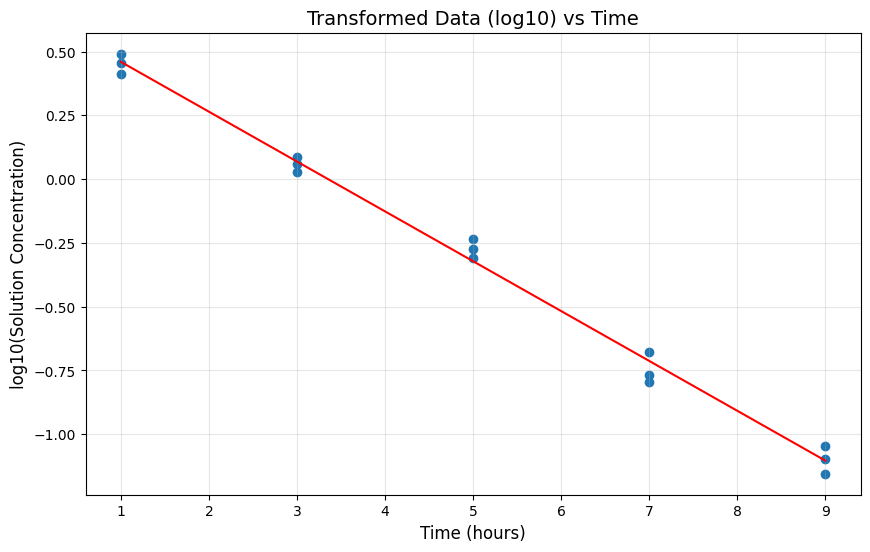

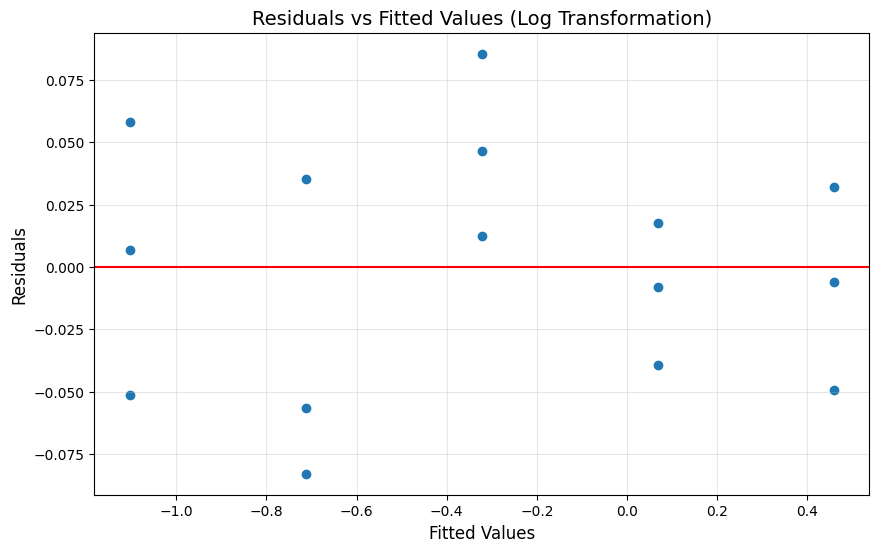

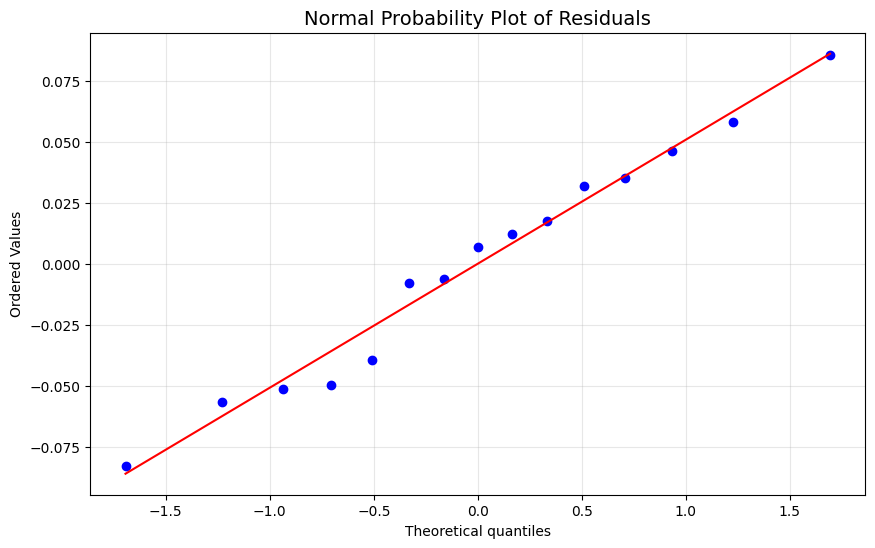

Transformed model: log10(Y) = 0.6549 + (-0.1954 * X)
Original units: Y = 10^(0.6549 + (-0.1954 * X))
Simplified: Y = 4.5173 * 10^(-0.1954 * X)


In [91]:

lambda_values = [-2.0, -1.0, -0.5, 0.0, 0.1, 0.2, 0.5, 1.0]
sse_values = []

K2 = np.exp(np.mean(np.log(df['Y'])))

for lamb in lambda_values:
    if lamb == 0:
        y_transformed = K2 * np.log(df['Y'])  
    else:
        K1 = 1 / (lamb * (K2**(lamb-1)))
        y_transformed = K1 * (df['Y']**lamb - 1)  
    
    X_const = sm.add_constant(df['X'])
    model_transformed = sm.OLS(y_transformed, X_const).fit()
    sse_values.append(model_transformed.ssr)

lambda_results = pd.DataFrame({
    'Lambda': lambda_values,
    'SSE': sse_values
})
print("\nBox-Cox Transformation Results:")
print(lambda_results)




df['Y_log'] = np.log10(df['Y'])

log_model = ols('Y_log ~ X', data=df).fit()
print("\nLog10 Transformation Regression Model Summary:")
print(log_model.summary())

b0_log = log_model.params[0]  
b1_log = log_model.params[1]  
print(f"Estimated Regression Function (transformed): Y' = {b0_log:.4f} + ({b1_log:.4f} * X)")

plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y_log'])
plt.plot(df['X'], log_model.predict(), color='red')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('log10(Solution Concentration)', fontsize=12)
plt.title('Transformed Data (log10) vs Time', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()



df['fitted_values_log'] = log_model.predict()
df['residuals_log'] = log_model.resid


plt.figure(figsize=(10, 6))
plt.scatter(df['fitted_values_log'], df['residuals_log'])
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Fitted Values (Log Transformation)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(df['residuals_log'], dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


print(f"Transformed model: log10(Y) = {b0_log:.4f} + ({b1_log:.4f} * X)")
print(f"Original units: Y = 10^({b0_log:.4f} + ({b1_log:.4f} * X))")
print(f"Simplified: Y = {10**b0_log:.4f} * 10^({b1_log:.4f} * X)")



# Question 8.38

In [92]:
data_c1  = pd.read_csv('Appendix C Data Sets/APPENC01.txt', header=None, sep='\s+')

In [93]:
data_c1.drop(0, axis='columns')
data_c1 = data_c1.loc[:, [10,11]]

In [94]:
data_c1.columns = ["Y", "X"]


                    PART (a): SECOND-ORDER REGRESSION MODEL                     

Second-Order Model: Y = 33.5482 + -1.6661X + 0.101164X²

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           2.79e-26
Time:                        18:57:04   Log-Likelihood:                -657.20
No. Observations:                 113   AIC:                             1320.
Df Residuals:                     110   BIC:                             1329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t| 

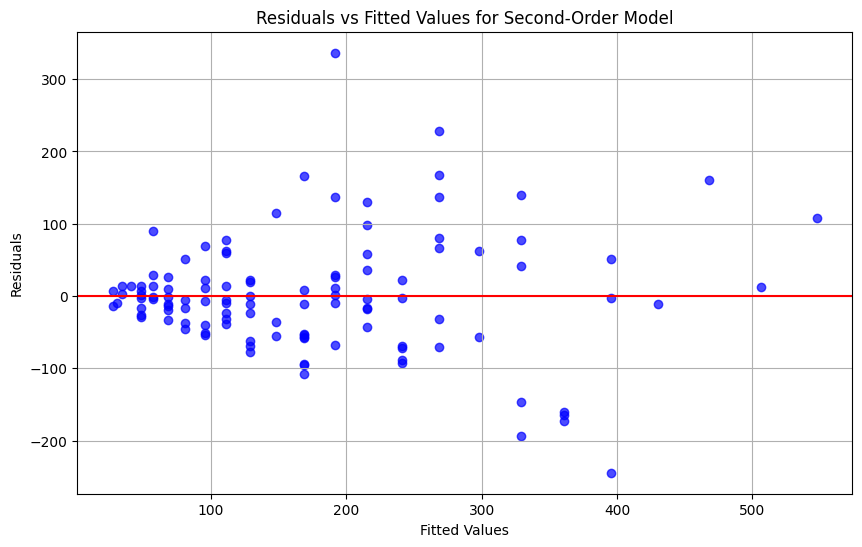


First-Order Model: Y = -136.5593 + 7.1782X
  - R² for first-order model: 0.6139
  - Adjusted R² for first-order model: 0.6104

Second-Order Model: Y = 33.5482 + -1.6661X + 0.101164X²
  - R² for second-order model: 0.6569
  - Adjusted R² for second-order model: 0.6507

Comparison:
  - Absolute increase in R²: 0.0431
  - Percentage increase: 7.01%

Hypothesis Test:
  H₀: β₂ = 0 (The quadratic term is not needed)
  H₁: β₂ ≠ 0 (The quadratic term is needed)

Alternative F-test Approach:
  - F-statistic: 13.8065
  - p-value: 0.000320
  - Decision rule: Reject H₀ if p-value < 0.01
  - Decision: REJECT the null hypothesis


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

data_c1['X_squared'] = data_c1['X'] ** 2

def hr(char="-", length=80):
    return char * length

def print_section(title):
    print("\n" + hr("="))
    print(title.center(80))
    print(hr("="))

print_section("PART (a): SECOND-ORDER REGRESSION MODEL")

second_order_model = ols('Y ~ X + X_squared', data=data_c1).fit()

fitted_values = second_order_model.fittedvalues
residuals = second_order_model.resid

b0 = second_order_model.params['Intercept']
b1 = second_order_model.params['X']
b2 = second_order_model.params['X_squared']

print(f"\nSecond-Order Model: Y = {b0:.4f} + {b1:.4f}X + {b2:.6f}X²")
print("\nModel Summary:")
print(second_order_model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Second-Order Model')
plt.grid(True)
plt.show()



first_order_model = ols('Y ~ X', data=data_c1).fit()

b0_first = first_order_model.params['Intercept']
b1_first = first_order_model.params['X']

r_squared_second = second_order_model.rsquared
r_squared_first = first_order_model.rsquared
adj_r_squared_second = second_order_model.rsquared_adj
adj_r_squared_first = first_order_model.rsquared_adj

print(f"\nFirst-Order Model: Y = {b0_first:.4f} + {b1_first:.4f}X")
print(f"  - R² for first-order model: {r_squared_first:.4f}")
print(f"  - Adjusted R² for first-order model: {adj_r_squared_first:.4f}")

print(f"\nSecond-Order Model: Y = {b0:.4f} + {b1:.4f}X + {b2:.6f}X²")
print(f"  - R² for second-order model: {r_squared_second:.4f}")
print(f"  - Adjusted R² for second-order model: {adj_r_squared_second:.4f}")

print(f"\nComparison:")
print(f"  - Absolute increase in R²: {r_squared_second - r_squared_first:.4f}")
print(f"  - Percentage increase: {(r_squared_second - r_squared_first) / r_squared_first * 100:.2f}%")





alpha = 0.01

quad_coef = second_order_model.params['X_squared']
quad_std_err = second_order_model.bse['X_squared']
quad_t_value = second_order_model.tvalues['X_squared']
quad_p_value = second_order_model.pvalues['X_squared']

degrees_freedom = second_order_model.df_resid
critical_t = stats.t.ppf(1 - alpha/2, degrees_freedom)

reject_null = abs(quad_t_value) > critical_t or quad_p_value < alpha

print("\nHypothesis Test:")
print("  H₀: β₂ = 0 (The quadratic term is not needed)")
print("  H₁: β₂ ≠ 0 (The quadratic term is needed)")


ssr_first = first_order_model.ssr  
ssr_second = second_order_model.ssr  
f_stat = ((ssr_first - ssr_second) / 1) / (ssr_second / degrees_freedom)
p_value_f = 1 - stats.f.cdf(f_stat, 1, degrees_freedom)

print("\nAlternative F-test Approach:")
print(f"  - F-statistic: {f_stat:.4f}")
print(f"  - p-value: {p_value_f:.6f}")
print(f"  - Decision rule: Reject H₀ if p-value < {alpha}")
print(f"  - Decision: {'REJECT' if p_value_f < alpha else 'FAIL TO REJECT'} the null hypothesis")




# Question 10.12

In [ ]:
data = pd.read_csv('chapter6/CH06PR18.txt', header=None, sep='\s+')
data.columns = ["Y", "X_1", "X_2", "X_3", "X_4"]
print(data.head())

X = data[["X_1", "X_2", "X_3", "X_4"]]
y = data["Y"]
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

influence = OLSInfluence(model)

n = len(data)
p = X_with_const.shape[1]

print("\nNumber of observations (n):", n)
print("Number of parameters (p):", p)
print("\nModel Summary:")
print(model.summary().tables[1])

# =============================================================================
# a. Studentized deleted residuals and Bonferroni outlier test
# =============================================================================
print("\n" + "="*80)
print("a. STUDENTIZED DELETED RESIDUALS AND BONFERRONI OUTLIER TEST")
print("="*80)

studentized_residuals = influence.resid_studentized_external

alpha = 0.01
bonf_alpha = alpha / (2 * n)
critical_value = stats.t.ppf(1 - bonf_alpha, n - p - 1)

print("\nHYPOTHESIS TEST:")
print("-"*50)
print("H₀: No outliers among Y observations")
print("H₁: At least one outlier among Y observations")
print(f"Test Statistic: max|t_i| where t_i are studentized deleted residuals")
print(f"Significance Level: α = {alpha}")
print(f"Bonferroni Adjusted Alpha: α/(2n) = {bonf_alpha:.6f}")
print(f"Critical Value: t(1-α/(2n), n-p-1) = {critical_value:.4f}")
print(f"Decision Rule: Reject H₀ if max|t_i| > {critical_value:.4f}")

max_abs_resid = np.max(np.abs(studentized_residuals))
outliers = np.abs(studentized_residuals) > critical_value
outlier_indices = np.where(outliers)[0]

print("\nRESULTS:")
print("-"*50)
print(f"Maximum Absolute Studentized Deleted Residual: {max_abs_resid:.4f}")

print("\nOutlying Y observations:")
if len(outlier_indices) > 0:
    for idx in outlier_indices:
        print(f"Observation {idx+1}: Studentized Residual = {studentized_residuals[idx]:.4f}")
    print(f"\nCONCLUSION: Reject H₀. Observations {', '.join([str(idx+1) for idx in outlier_indices])} are outliers based on the Bonferroni test at α = .01")
else:
    print("No outliers detected")
    print("\nCONCLUSION: Fail to reject H₀. No outliers detected based on the Bonferroni test at α = .01")

      Y  X_1    X_2   X_3     X_4
0  13.5    1   5.02  0.14  123000
1  12.0   14   8.19  0.27  104079
2  10.5   16   3.00  0.00   39998
3  15.0    4  10.70  0.05   57112
4  14.0   11   8.97  0.07   60000

Number of observations (n): 81
Number of parameters (p): 5

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2006      0.578     21.110      0.000      11.049      13.352
X_1           -0.1420      0.021     -6.655      0.000      -0.185      -0.100
X_2            0.2820      0.063      4.464      0.000       0.156       0.408
X_3            0.6193      1.087      0.570      0.570      -1.545       2.784
X_4         7.924e-06   1.38e-06      5.722      0.000    5.17e-06    1.07e-05

a. STUDENTIZED DELETED RESIDUALS AND BONFERRONI OUTLIER TEST

HYPOTHESIS TEST:
--------------------------------------------------
H₀: No outliers among Y observations

In [ ]:
print("\n" + "="*80)
print("b. HAT MATRIX DIAGONAL ELEMENTS")
print("="*80)

leverage = influence.hat_matrix_diag

leverage_threshold = 2 * p / n

print(f"\nAverage Leverage: p/n = {p/n:.4f}")
print(f"High Leverage: 2p/n = {leverage_threshold:.4f}")


high_leverage = leverage > leverage_threshold
high_leverage_indices = np.where(high_leverage)[0]

print("\nRESULTS:")
print("-"*50)


print("\nOutlying X observations (high leverage points):")
if len(high_leverage_indices) > 0:
    for idx in high_leverage_indices:
        print(f"Observation {idx+1}: Leverage = {leverage[idx]:.4f}")
    print(f"\nCONCLUSION: Observations {', '.join([str(idx+1) for idx in high_leverage_indices])} are identified as outlying X observations")
else:
    print("No high leverage points detected")
    print("\nCONCLUSION: No outlying X observations detected")


b. HAT MATRIX DIAGONAL ELEMENTS

Average Leverage: p/n = 0.0617
High Leverage: 2p/n = 0.1235

RESULTS:
--------------------------------------------------

Outlying X observations (high leverage points):
Observation 3: Leverage = 0.1953
Observation 8: Leverage = 0.2022
Observation 53: Leverage = 0.1792
Observation 61: Leverage = 0.3037
Observation 65: Leverage = 0.1291

CONCLUSION: Observations 3, 8, 53, 61, 65 are identified as outlying X observations


In [ ]:
print("\n" + "="*80)
print("c. HIDDEN EXTRAPOLATION CHECK")
print("="*80)

new_obs_values = [10, 12.00, 0.05, 350000]  
print("\nProperty Characteristics:")
print(f"Age: {new_obs_values[0]} years")
print(f"Operating Expenses and Taxes: {new_obs_values[1]}")
print(f"Occupancy Rate: {new_obs_values[2]}")
print(f"Square Footage: {new_obs_values[3]}")
print('Perform direct leverage calculation')
new_obs = np.array([1] + new_obs_values)

X_transpose_X_inv = np.linalg.inv(X_with_const.T @ X_with_const)
h_new = np.dot(np.dot(new_obs, X_transpose_X_inv), new_obs)

print("\nRESULTS:")
print("-"*50)
print(f"Leverage value for new observation (h00): {h_new:.4f}")
print(f"Threshold for high leverage (2p/n): {leverage_threshold:.4f}")

if h_new > leverage_threshold:
    print("\nCONCLUSION: This estimate will involve hidden extrapolation because the leverage value exceeds the threshold.")
else:
    print("\nCONCLUSION: This estimate will not involve hidden extrapolation because the leverage\n value is below the threshold.")


c. HIDDEN EXTRAPOLATION CHECK

Property Characteristics:
Age: 10 years
Operating Expenses and Taxes: 12.0
Occupancy Rate: 0.05
Square Footage: 350000
Perform direct leverage calculation

RESULTS:
--------------------------------------------------
Leverage value for new observation (h00): 0.0529
Threshold for high leverage (2p/n): 0.1235

CONCLUSION: This estimate will not involve hidden extrapolation because the leverage
 value is below the threshold.


In [ ]:
print("\n" + "="*80)
print("d. INFLUENCE MEASURES FOR SPECIFIC CASES")
print("="*80)


outlying_X_cases = [61, 8, 3, 53]
outlying_Y_cases = [6, 62]
cases_of_interest = outlying_X_cases + outlying_Y_cases
cases_0_indexed = [case-1 for case in cases_of_interest]

dffits = influence.dffits
dfbetas = influence.dfbetas
cooks_d = influence.cooks_distance[0]
if isinstance(dffits, tuple):
    dffits = dffits[0]

dffits_threshold = 2 * np.sqrt(p / n)
dfbetas_threshold = 2 / np.sqrt(n)
cooks_d_threshold = 4 / (n - p)

print("\nThresholds for Influence Measures:")
print(f"DFFITS: |DFFITS| > {dffits_threshold:.4f}")
print(f"DFBETAS: |DFBETAS| > {dfbetas_threshold:.4f}")
print(f"Cook's Distance: Di > {cooks_d_threshold:.4f}")

print("\nRESULTS:")
print("-"*50)
print("\nInfluence Measures Summary Table:")
print("-"*90)
print(f"{'Case':<6} | {'DFFITS':<10} | {'DFBETAS(Int)':<12} | {'DFBETAS(X1)':<12} | {'DFBETAS(X2)':<12} | {'DFBETAS(X3)':<12} | {'DFBETAS(X4)':<12} | {'Cooks D':<10}")
print("-"*90)

for case in cases_of_interest:
    case_idx = case - 1  
    dfbetas_vals = [dfbetas[case_idx, j] for j in range(5)]  
    
    row = f"{case:<6} | {dffits[case_idx]:<10.4f} | "
    for val in dfbetas_vals:
        row += f"{val:<12.4f} | "
    row += f"{cooks_d[case_idx]:<10.4f}"
    print(row)
print("-"*90)

print("\nDetailed Assessment:")
for case in cases_of_interest:
    case_idx = case - 1 
    print(f"\nCase {case}:")
    
    print(f"  DFFITS: {dffits[case_idx]:.4f}")
    if abs(dffits[case_idx]) > dffits_threshold:
        print(f"  - Influential based on DFFITS (|DFFITS| > {dffits_threshold:.4f})")
    else:
        print(f"  - Not influential based on DFFITS")
    
    print("  DFBETAS:")
    dfbetas_influential = False
    for j in range(X_with_const.shape[1]):
        param_name = f"X_{j-1}" if j > 0 else "Intercept"
        print(f"    {param_name}: {dfbetas[case_idx, j]:.4f}")
        if abs(dfbetas[case_idx, j]) > dfbetas_threshold:
            print(f"    - Influential for {param_name} parameter (|DFBETAS| > {dfbetas_threshold:.4f})")
            dfbetas_influential = True
    if not dfbetas_influential:
        print("    - Not influential based on DFBETAS for any parameter")
    
    print(f"  Cook's Distance: {cooks_d[case_idx]:.4f}")
    if cooks_d[case_idx] > cooks_d_threshold:
        print(f"  - Influential based on Cook's Distance (Di > {cooks_d_threshold:.4f})")
    else:
        print(f"  - Not influential based on Cook's Distance")

print("\nOVERALL CONCLUSION:")
print("-"*50)
influential_cases = []
for case in cases_of_interest:
    case_idx = case - 1
    if (abs(dffits[case_idx]) > dffits_threshold or 
        any(abs(dfbetas[case_idx, j]) > dfbetas_threshold for j in range(X_with_const.shape[1])) or 
        cooks_d[case_idx] > cooks_d_threshold):
        influential_cases.append(case)

if influential_cases:
    print(f"Cases {', '.join(map(str, influential_cases))} are influential based on at least one measure.")
else:
    print("None of the specified cases are influential based on the influence measures.")


d. INFLUENCE MEASURES FOR SPECIFIC CASES

Thresholds for Influence Measures:
DFFITS: |DFFITS| > 0.4969
DFBETAS: |DFBETAS| > 0.2222
Cook's Distance: Di > 0.0526

RESULTS:
--------------------------------------------------

Influence Measures Summary Table:
------------------------------------------------------------------------------------------
Case   | DFFITS     | DFBETAS(Int) | DFBETAS(X1)  | DFBETAS(X2)  | DFBETAS(X3)  | DFBETAS(X4)  | Cooks D   
------------------------------------------------------------------------------------------
61     | 0.6387     | -0.0554      | 0.0242       | -0.0076      | 0.5457       | 0.0038       | 0.0817    
8      | 0.1164     | -0.0142      | -0.0072      | 0.0030       | 0.0955       | 0.0126       | 0.0027    
3      | -0.2843    | -0.2318      | -0.1553      | 0.2364       | 0.1008       | -0.0115      | 0.0163    
53     | 0.5252     | -0.0196      | -0.0240      | -0.0243      | 0.4180       | 0.0490       | 0.0550    
6      | -0.8735    |

In [ ]:
print("\n" + "="*80)
print("e. AVERAGE ABSOLUTE PERCENT DIFFERENCE IN FITTED VALUES")
print("="*80)

print("\nCalculating how fitted values change when each case is removed...")


fitted_all = model.fittedvalues

avg_abs_pct_diff = {}

for case in cases_of_interest:
    case_idx = case - 1
    
    mask = np.ones(len(data), dtype=bool)
    mask[case_idx] = False
    X_without_case = X_with_const[mask]
    y_without_case = y[mask]
    
    model_without_case = sm.OLS(y_without_case, X_without_case).fit()
    
    fitted_without_case = model_without_case.predict(X_with_const)
    
    abs_pct_diff = np.abs((fitted_all - fitted_without_case) / fitted_all * 100)
    avg_diff = np.mean(abs_pct_diff)
    avg_abs_pct_diff[case] = avg_diff

print("\nRESULTS:")
print("-"*50)
print("\nAverage Absolute Percent Difference in Fitted Values:")
print("-"*60)
print(f"{'Case':<6} | {'Average Difference (%)':<25} | {'Influence'}")
print("-"*60)
for case, avg_diff in avg_abs_pct_diff.items():
    influence_level = "Substantial" if avg_diff > 1 else "Minimal"
    print(f"{case:<6} | {avg_diff:<25.4f} | {influence_level}")
print("-"*60)

print("\nINTERPRETATION:")
print("-"*50)
for case, avg_diff in avg_abs_pct_diff.items():
    if avg_diff > 1:  
        print(f"Case {case} has substantial influence on fitted values (average difference: {avg_diff:.4f}%)")
    else:
        print(f"Case {case} has minimal influence on fitted values (average difference: {avg_diff:.4f}%)")


e. AVERAGE ABSOLUTE PERCENT DIFFERENCE IN FITTED VALUES

Calculating how fitted values change when each case is removed...

RESULTS:
--------------------------------------------------

Average Absolute Percent Difference in Fitted Values:
------------------------------------------------------------
Case   | Average Difference (%)    | Influence
------------------------------------------------------------
61     | 0.3002                    | Minimal
8      | 0.0544                    | Minimal
3      | 0.1926                    | Minimal
53     | 0.2347                    | Minimal
6      | 0.5563                    | Minimal
62     | 0.4168                    | Minimal
------------------------------------------------------------

INTERPRETATION:
--------------------------------------------------
Case 61 has minimal influence on fitted values (average difference: 0.3002%)
Case 8 has minimal influence on fitted values (average difference: 0.0544%)
Case 3 has minimal influence on fitted 


f. COOK'S DISTANCE INDEX PLOT AND INFLUENTIAL CASES

Threshold for Influential Cases:
Cook's Distance: Di > 0.0526

RESULTS:
--------------------------------------------------
Influential observations based on Cook's Distance:
Observation 6: Cook's Distance = 0.1374
Observation 9: Cook's Distance = 0.0764
Observation 26: Cook's Distance = 0.0603
Observation 38: Cook's Distance = 0.0663
Observation 42: Cook's Distance = 0.0553
Observation 43: Cook's Distance = 0.0529
Observation 53: Cook's Distance = 0.0550
Observation 61: Cook's Distance = 0.0817
Observation 62: Cook's Distance = 0.0875
Observation 64: Cook's Distance = 0.0612
Observation 65: Cook's Distance = 0.0555
Observation 80: Cook's Distance = 0.0858

CONCLUSION: Observations 6, 9, 26, 38, 42, 43, 53, 61, 62, 64, 65, 80 are influential based on Cook's Distance

A Cook's Distance Index Plot has been saved as 'cooks_distance_plot.png'



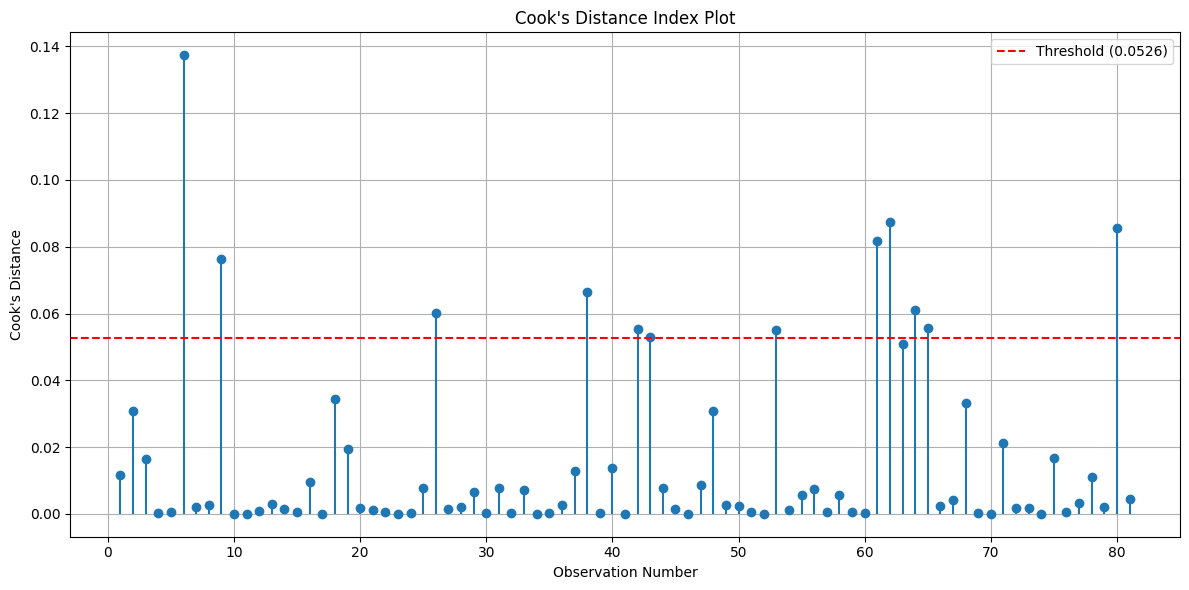

In [ ]:
print("\n" + "="*80)
print("f. COOK'S DISTANCE INDEX PLOT AND INFLUENTIAL CASES")
print("="*80)


cooks_d_all = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(12, 6))
plt.stem(range(1, n+1), cooks_d_all, markerfmt='o', basefmt=' ')
plt.axhline(y=cooks_d_threshold, color='r', linestyle='--', label=f'Threshold ({cooks_d_threshold:.4f})')
plt.xlabel('Observation Number')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Index Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('cooks_distance_plot.png')


influential_indices = np.where(cooks_d_all > cooks_d_threshold)[0]

print("\nThreshold for Influential Cases:")
print(f"Cook's Distance: Di > {cooks_d_threshold:.4f}")

print("\nRESULTS:")
print("-"*50)
if len(influential_indices) > 0:
    print("Influential observations based on Cook's Distance:")
    for idx in influential_indices:
        print(f"Observation {idx+1}: Cook's Distance = {cooks_d_all[idx]:.4f}")
    print(f"\nCONCLUSION: Observations {', '.join([str(idx+1) for idx in influential_indices])} are influential based on Cook's Distance")
else:
    print("No influential observations detected based on Cook's Distance")
    print("\nCONCLUSION: No observations are influential according to Cook's Distance")

print("\nA Cook's Distance Index Plot has been saved as 'cooks_distance_plot.png'")

print("\n" + "="*80)